In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [ ]:
def prepare_data(timeseries_data, n_features):
  X, y =[],[]
  for i in range(len(timeseries_data)):
    end_ix = i + n_features
    if end_ix > len(timeseries_data)-1:
      break
    seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)


In [ ]:
import numpy as np
arr = np.array([[1,2,3,4,5,6,7,8],[11,12,13,14,15,16,17,18],[34,35,36,37,38,39,40,41]])
i=0
data =[0]*7893
while (i<7893):
  nu=np.random.randint(0,3)
  data[i]=arr[nu,0]
  i=i+1
  data[i]=arr[nu,1]
  i=i+1
  data[i]=arr[nu,2]
  i=i+1
  data[i]=arr[nu,3]
  i=i+1
  data[i]=arr[nu,4]
  i=i+1
  data[i]=arr[nu,5]
  i=i+1
  data[i]=arr[nu,6]
  i=i+1
  data[i]=arr[nu,7]
  i=i+1
  data[i]=np.random.randint(0,9)
  i=i+1
  


In [ ]:
data

[34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 3,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 5,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 6,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 4,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 1,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 6,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 1,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 5,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 0,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 5,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 8,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 1,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 4,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 5,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 5,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 5,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 8,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 7,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 7,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 1,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 6,
 34,
 35,
 36,
 37,
 38,
 39

In [ ]:
x,y=prepare_data(data,3)
x

array([[34, 35, 36],
       [35, 36, 37],
       [36, 37, 38],
       ...,
       [37, 38, 39],
       [38, 39, 40],
       [39, 40, 41]])

In [ ]:
y

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
x= x.reshape(x.shape[0],x.shape[1],1)
y1=np.reshape(y,(1000))
y1.shape

(1000,)

In [ ]:
import numpy as np
sample=1000
sequencelength=4
x=np.zeros((sample,3),dtype=int)
y=np.zeros((sample,1),dtype=int)
input=np.zeros((sample,sequencelength),dtype=int)
dummy=np.array([[1,2,3,0],[6,2,7,1],[9,3,4,2]])
for i in range (0,sample):
  random=np.random.randint(0,2)
  input[i,:]=dummy[random,:]
for i in range (0,sample):
    y[i]=input[i,3]
    for j in range (0,3):
      x[i,j]=input[i,j]
  
  

  

In [ ]:
Y=np.zeros((7890,42),dtype=int)
for i in range(0,7890):
  s=y[i]
  Y[i,s]=1
   

IndexError: ignored

In [ ]:
x[1]

array([[35],
       [36],
       [37]])

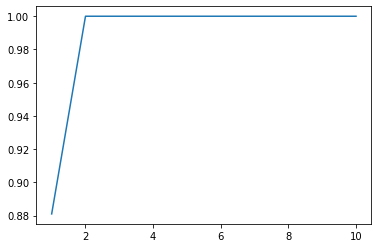

In [ ]:
a=history.history['accuracy']
epochs=range(1,11)
import matplotlib.pyplot as plt
plt.plot(epochs,a)

In [ ]:
model.predict(x)

array([[-1.1154623 , -4.146445  , -4.00189   , ..., -1.0582888 ,
        -1.206603  , -2.447066  ],
       [-1.1519687 , -4.345389  , -4.206472  , ..., -1.1111467 ,
        -1.2555866 , -2.578466  ],
       [-1.1876055 , -4.546927  , -4.4136786 , ..., -1.1655297 ,
        -1.3049246 , -2.7114153 ],
       ...,
       [-0.32645422, -1.0023471 , -0.8471215 , ..., -0.33528647,
        -0.37567344, -0.50119007],
       [-0.36008656, -1.1107179 , -0.947426  , ..., -0.35893032,
        -0.40816393, -0.55887324],
       [-0.3960209 , -1.2243191 , -1.0547339 , ..., -0.38371396,
        -0.44090503, -0.62099516]], dtype=float32)

In [ ]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
model=Sequential()
model.add(LSTM(200,activation='relu', return_sequences=True, input_shape=(3,1)))
model.add(LSTM(200,activation='relu'))
model.add(Dense(40))
model.compile(loss='MSE',optimizer='adam',metrics=['accuracy'])
history=model.fit(x,y1,epochs=200,verbose=1)

Epoch 1/200
32/32 [==============================] - 2s 16ms/step - loss: 0.2204 - accuracy: 0.0000e+00
Epoch 2/200
32/32 [==============================] - 1s 17ms/step - loss: 0.0256 - accuracy: 0.0490
Epoch 3/200
32/32 [==============================] - 1s 16ms/step - loss: 0.0089 - accuracy: 0.0480
Epoch 4/200
32/32 [==============================] - 1s 17ms/step - loss: 0.0021 - accuracy: 0.0190
Epoch 5/200
32/32 [==============================] - 1s 16ms/step - loss: 3.1715e-04 - accuracy: 0.0000e+00
Epoch 6/200
32/32 [==============================] - 1s 16ms/step - loss: 7.9457e-05 - accuracy: 0.0000e+00
Epoch 7/200
32/32 [==============================] - 1s 16ms/step - loss: 1.9426e-05 - accuracy: 0.0000e+00
Epoch 8/200
32/32 [==============================] - 1s 17ms/step - loss: 4.3749e-06 - accuracy: 0.0000e+00
Epoch 9/200
32/32 [==============================] - 1s 17ms/step - loss: 9.1214e-07 - accuracy: 0.0000e+00
Epoch 10/200
32/32 [==============================] - 1s

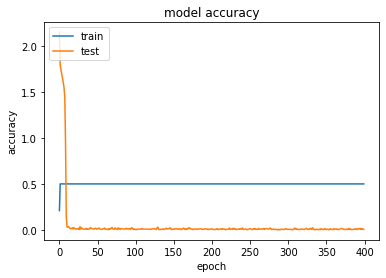

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
